CFHT_MegaCam.r.dat
0.6382587077002766
CFHT_MegaCam.u.dat
0.3676116622283926
Spitzer_IRAC.I1.dat
3.537841063025199
Spitzer_IRAC.I2.dat
4.47804851620293
Spitzer_IRAC.I3.dat
5.69617816790326
Spitzer_IRAC.I4.dat
7.797839195517652
Subaru_HSC.Y.dat
0.9775071767519288
Subaru_HSC.g.dat
0.47982082073076493
Subaru_HSC.i.dat
0.7727013207278469
Subaru_HSC.r.dat
0.6218442965074332
Subaru_HSC.z.dat
0.8908502909990401
UKIRT_UKIDSS.H.dat
1.6354330088092153
UKIRT_UKIDSS.J.dat
1.2501181984257952
UKIRT_UKIDSS.K.dat
2.20583623053632


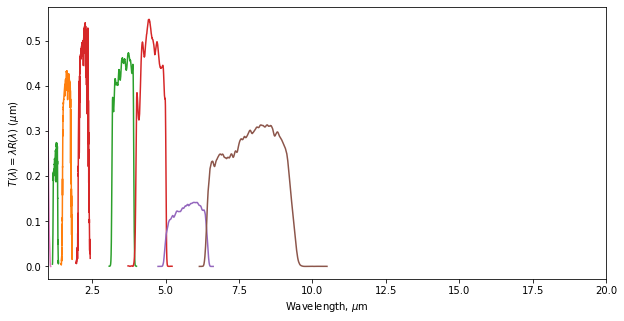

In [45]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

filt_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/Filters/'
tran_dir = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG/Scripts/SKIRT/Photometry/SKIRT9/Filters/'

filt_names = list(sorted([filt.split('/')[-1] for filt in glob(f'{filt_dir}/*.dat')]))
             
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Wavelength, $\mu$m')
ax.set_ylabel('$T(\lambda) = \lambda R(\lambda)$ ($\mu$m)')

for filt in filt_names:
    # wl angstrom, response unitless
    wl,response = np.loadtxt(f'{filt_dir}/{filt}',unpack=True) 
    wl*=1e-4 # to microns
    # transmission correction for energy counters / photon counters
    if 'Spitzer_IRAC' in filt:
        transmission = response
    else:
        transmission = response*wl
    ax.plot(wl,transmission)
    ax.set_xlim(1,20)
    np.savetxt(f'{tran_dir}/{filt}',np.column_stack([wl,transmission]))
    
    
    print(filt)
    print(np.sqrt(np.trapz(transmission,wl)/np.trapz(transmission/wl**2,wl)))
    
    



In [7]:
import numpy as np
import copy

project_path = '/lustre/work/connor.bottrell/Simulations/IllustrisTNG'
skirt_path = f'{project_path}/Scripts/SKIRT'
band_dir = f'{skirt_path}/Photometry/SKIRT9/Filters'
bands = ['CFHT_MegaCam.u','CFHT_MegaCam.r',
       'Subaru_HSC.g','Subaru_HSC.r','Subaru_HSC.i','Subaru_HSC.z','Subaru_HSC.Y',
       'UKIRT_UKIDSS.J','UKIRT_UKIDSS.H','UKIRT_UKIDSS.K',
       'Spitzer_IRAC.I1','Spitzer_IRAC.I2','Spitzer_IRAC.I3','Spitzer_IRAC.I4']

wl_min,wl_max,wl_probe=0.1,5,0.55
redshift=0.099999
# band_names_in = [f'{band_path}/{band}.dat' for band in bands]
# band_names,wl_pivot = [],[]
# for band_name in band_names_in:
#     wl_band,transmission = np.loadtxt(band_name,unpack=True)
#     if (wl_max*(1+redshift) >= wl_band[-1]) and (wl_min*(1+redshift) <= wl_band[0]):
#         band_names.append(band_name)
#         wl_pivot.append(np.sqrt(np.trapz(transmission,wl_band)/np.trapz(transmission/wl_band**2,wl_band)))
        
        
# order bandpasses by pivot wl (skirt output default) and write to .ski
band_dir = f'{skirt_path}/Photometry/SKIRT9/Filters'
wl_pivot = []
for band in copy.copy(bands):
    wl_band,transmission = np.loadtxt(f'{band_dir}/{band}.dat',unpack=True)
    if (wl_max*(1+redshift) < wl_band[-1]) or (wl_min*(1+redshift) > wl_band[0]):
        # band is removed if it source spectrum does not cover its entire range
        bands.remove(band)
    else:
        # band stays and its pivot wavelenght is computed and appended
        wl_pivot.append(np.sqrt(np.trapz(transmission,wl_band)/np.trapz(transmission/wl_band**2,wl_band)))
        
# sort_idx = np.argsort(wl_pivot)
# band_names = np.array(band_names)[sort_idx]
sort_idx = np.argsort(wl_pivot)
bands = np.array(bands)[sort_idx]
print(bands)

# print([band_name.split('/')[-1].strip('.dat') for band_name in band_names])  


['CFHT_MegaCam.u' 'Subaru_HSC.g' 'Subaru_HSC.r' 'CFHT_MegaCam.r'
 'Subaru_HSC.i' 'Subaru_HSC.z' 'Subaru_HSC.Y' 'UKIRT_UKIDSS.J'
 'UKIRT_UKIDSS.H' 'UKIRT_UKIDSS.K' 'Spitzer_IRAC.I1' 'Spitzer_IRAC.I2']


In [14]:
(216*1e3/100)**2*32/8*12

223948800.0